In [2]:
!date

Mon Apr 24 13:29:27 EDT 2023


In [3]:
pwd

'/mmfs1/data/aglinska/BC-actionpred-seg'

In [4]:
import PIL
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.ndimage.filters import gaussian_filter
import os
import shutil
import random
#import cv2
from skimage.transform import resize
from datetime import datetime
now = datetime.now

/data/aglinska/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [26]:
def load_video(fn):
    import skvideo
    import skvideo.io
    videodata = skvideo.io.vread(fn)
    return videodata

In [27]:
def safe_mkdir(fn):
    import os
    if not os.path.exists(fn):
        os.mkdir(fn)

In [28]:
dataset_dir = './Data/dataset-v3-10/'
categories = [cat for cat in os.listdir(dataset_dir) if not cat.startswith('.')]
categories.sort()
n = len(categories)
print(n)
print(categories[0:3])
print(categories[-3::])

45
['CPR', 'badminton_overswing', 'basketball_pass']
['weightlifting_stand', 'whipping', 'yoga_updog']


### Make dataset

In [5]:
make_dataset_file = True

In [113]:
data_frames = []
data_categories = []

for c in tqdm( range(n) ): # loop over categories
    this_cat = categories[c]
    files = os.listdir(os.path.join(dataset_dir,this_cat))
    files.sort()
    vid_nums = np.unique([int(file.replace(this_cat+'_','')[0:3]) for file in files])
    vid_nums = vid_nums[0:10]
    
    for vid_num in vid_nums: # loop over videos 
        video_data = load_video(os.path.join(dataset_dir,this_cat,f'{this_cat}_{vid_num:03d}.mp4'))
        nframes = video_data.shape[0]
        for f in range(nframes): # loop over frames
            data_frames.append( video_data[f,:,:,:] )
            data_categories.append( c )
            
np.savez_compressed('./Data/pytorch-data/pytorch-data-orig.npz',data_frames=np.array(data_frames),data_categories=np.array(data_categories))
    
    
data_frames = []
data_categories = []

for c in tqdm( range(n) ): # loop over categories
    this_cat = categories[c]
    files = os.listdir(os.path.join(dataset_dir,this_cat))
    files.sort()
    vid_nums = np.unique([int(file.replace(this_cat+'_','')[0:3]) for file in files])
    vid_nums = vid_nums[0:10]

    for vid_num in vid_nums: # loop over videos 
        video_data = load_video(os.path.join(dataset_dir,this_cat,f'{this_cat}_{vid_num:03d}_item_0_fwd_seg.mp4'))
        nframes = video_data.shape[0]
        for f in range(nframes): # loop over frames
            data_frames.append( video_data[f,:,:,:] )
            data_categories.append( c )
            
np.savez_compressed('./Data/pytorch-data/pytorch-data-seg.npz',data_frames=np.array(data_frames),data_categories=np.array(data_categories))
    
    
data_frames = []
data_categories = []
for c in tqdm( range(n) ): # loop over categories
    this_cat = categories[c]
    files = os.listdir(os.path.join(dataset_dir,this_cat))
    files.sort()
    vid_nums = np.unique([int(file.replace(this_cat+'_','')[0:3]) for file in files])
    vid_nums = vid_nums[0:10]
    

    for vid_num in vid_nums: # loop over videos 
        video_data = load_video(os.path.join(dataset_dir,this_cat,f'{this_cat}_{vid_num:03d}_item_0_inp_seg.mp4'))
        nframes = video_data.shape[0]
        for f in range(nframes): # loop over frames
            data_frames.append( video_data[f,:,:,:] )
            data_categories.append( c )
            
np.savez_compressed('./Data/pytorch-data/pytorch-data-bg.npz',data_frames=np.array(data_frames),data_categories=np.array(data_categories))

data_frames = []
data_categories = []
for c in tqdm( range(n) ): # loop over categories
    this_cat = categories[c]
    files = os.listdir(os.path.join(dataset_dir,this_cat))
    files.sort()
    vid_nums = np.unique([int(file.replace(this_cat+'_','')[0:3]) for file in files])
    vid_nums = vid_nums[0:10]
    

    for vid_num in vid_nums: # loop over videos 
        video_data = load_video(os.path.join(dataset_dir,this_cat,f'{this_cat}_{vid_num:03d}_item_0_bg_rnd.mp4'))
        nframes = video_data.shape[0]
        for f in range(nframes): # loop over frames
            data_frames.append( video_data[f,:,:,:] )
            data_categories.append( c )
            
np.savez_compressed('./Data/pytorch-data/pytorch-data-rnd.npz',data_frames=np.array(data_frames),data_categories=np.array(data_categories))
    

100%|██████████| 45/45 [01:47<00:00,  2.39s/it]


In [114]:
print(np.load('./Data/pytorch-data/pytorch-data-orig.npz')['data_frames'].shape)
print(np.load('./Data/pytorch-data/pytorch-data-seg.npz')['data_frames'].shape)
print(np.load('./Data/pytorch-data/pytorch-data-bg.npz')['data_frames'].shape)
print(np.load('./Data/pytorch-data/pytorch-data-rnd.npz')['data_frames'].shape)

(23706, 360, 640, 3)
(23706, 360, 640, 3)
(23706, 360, 640, 3)
(23706, 360, 640, 3)


KeyboardInterrupt: 

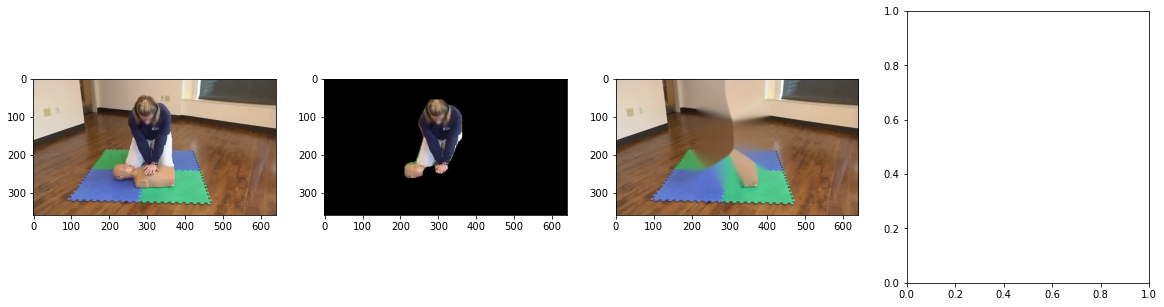

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(np.load('./Data/pytorch-data/pytorch-data-orig.npz')['data_frames'][0,:,:,:])
plt.subplot(1,4,2)
plt.imshow(np.load('./Data/pytorch-data/pytorch-data-seg.npz')['data_frames'][0,:,:,:])
plt.subplot(1,4,3)
plt.imshow(np.load('./Data/pytorch-data/pytorch-data-bg.npz')['data_frames'][0,:,:,:])
plt.subplot(1,4,4)
plt.imshow(np.load('./Data/pytorch-data/pytorch-data-rnd.npz')['data_frames'][0,:,:,:])

In [52]:
dump = np.load('./Data/pytorch-data/pytorch-data-orig.npz')
data_frames = dump['data_frames']
n = data_frames.shape[0]
data_categories = dump['data_categories']

data_frames2 = np.zeros(shape=(n,224,224,3), dtype=np.float16)
for i in tqdm(range(n)):
    data_frames2[i,:,:,:] = resize(np.pad(data_frames[i,:,:,:],((140,140),(0,0),(0,0))),(224,224,3)).astype(np.float16)
    
ofn = './Data/pytorch-data/pytorch-data-orig-224.npz'
np.savez_compressed(ofn,data_frames=data_frames2,data_categories=data_categories)

100%|██████████| 23706/23706 [07:21<00:00, 53.71it/s]


In [55]:
print(f'loading: {now()}')
dump = np.load('./Data/pytorch-data/pytorch-data-seg.npz')
data_frames = dump['data_frames']
n = data_frames.shape[0]
data_categories = dump['data_categories']

print(f'calculating: {now()}')
data_frames2 = np.zeros(shape=(n,224,224,3), dtype=np.float16)
for i in tqdm(range(n)):
    data_frames2[i,:,:,:] = resize(np.pad(data_frames[i,:,:,:],((140,140),(0,0),(0,0))),(224,224,3)).astype(np.float16)
    
print(f'saving: {now()}')
ofn = './Data/pytorch-data/pytorch-data-seg-224.npz'
np.savez_compressed(ofn,data_frames=data_frames2,data_categories=data_categories)
print(f'all done: {now()}')

loading: 2023-04-18 09:11:52.007518


  0%|          | 6/23706 [00:00<07:31, 52.50it/s]

calculating: 2023-04-18 09:12:33.691382


100%|██████████| 23706/23706 [07:22<00:00, 53.54it/s]


saving: 2023-04-18 09:19:56.456311
all done: 2023-04-18 09:20:46.502965


In [56]:
print(f'loading: {now()}')
dump = np.load('./Data/pytorch-data/pytorch-data-bg.npz')
data_frames = dump['data_frames']
n = data_frames.shape[0]
data_categories = dump['data_categories']

print(f'calculating: {now()}')
data_frames2 = np.zeros(shape=(n,224,224,3), dtype=np.float16)
for i in tqdm(range(n)):
    data_frames2[i,:,:,:] = resize(np.pad(data_frames[i,:,:,:],((140,140),(0,0),(0,0))),(224,224,3)).astype(np.float16)

print(f'saving: {now()}')
ofn = './Data/pytorch-data/pytorch-data-bg-224.npz'
np.savez_compressed(ofn,data_frames=data_frames2,data_categories=data_categories)
print(f'all done: {now()}')

loading: 2023-04-18 11:14:00.170808


  0%|          | 6/23706 [00:00<07:41, 51.40it/s]

calculating: 2023-04-18 11:15:07.012103


100%|██████████| 23706/23706 [07:19<00:00, 53.90it/s]


saving: 2023-04-18 11:22:26.882089
all done: 2023-04-18 11:25:19.420565


In [57]:
print(f'loading: {now()}')
dump = np.load('./Data/pytorch-data/pytorch-data-rnd.npz')
data_frames = dump['data_frames']
n = data_frames.shape[0]
data_categories = dump['data_categories']

print(f'calculating: {now()}')
data_frames2 = np.zeros(shape=(n,224,224,3), dtype=np.float16)
for i in tqdm(range(n)):
    data_frames2[i,:,:,:] = resize(np.pad(data_frames[i,:,:,:],((140,140),(0,0),(0,0))),(224,224,3)).astype(np.float16)

print(f'saving: {now()}')    
ofn = './Data/pytorch-data/pytorch-data-rnd-224.npz'
np.savez_compressed(ofn,data_frames=data_frames2,data_categories=data_categories)
print(f'all done: {now()}')

loading: 2023-04-18 11:25:19.430847


  0%|          | 6/23706 [00:00<07:37, 51.77it/s]

calculating: 2023-04-18 11:26:30.747336


100%|██████████| 23706/23706 [07:21<00:00, 53.66it/s]


saving: 2023-04-18 11:33:52.577685
all done: 2023-04-18 11:36:50.061572


## Load data

In [15]:
%%time
#data_orig_frames = np.load('./Data/pytorch-data/pytorch-data-orig-224.npz')['data_frames']
#data_orig_categories = np.load('./Data/pytorch-data/pytorch-data-orig-224.npz')['data_categories']

data_seg_frames = np.load('./Data/pytorch-data/pytorch-data-seg-224.npz')['data_frames']
data_seg_categories = np.load('./Data/pytorch-data/pytorch-data-seg-224.npz')['data_categories']

# data_bg_frames = np.load('./Data/pytorch-data/pytorch-data-bg-224.npz')['data_frames']
# data_bg_categories = np.load('./Data/pytorch-data/pytorch-data-bg-224.npz')['data_categories']

# data_rnd_frames = np.load('./Data/pytorch-data/pytorch-data-rnd-224.npz')['data_frames']
# data_rnd_categories = np.load('./Data/pytorch-data/pytorch-data-rnd-224.npz')['data_categories']

CPU times: user 16.1 s, sys: 1.33 s, total: 17.5 s
Wall time: 17.5 s


In [20]:
data_orig_frames = data_seg_frames
data_orig_categories = data_seg_categories

In [21]:
print(data_orig_frames.shape)
print(data_seg_categories.shape)

(23706, 224, 224, 3)
(23706,)


In [22]:
n = data_orig_frames.shape[0]
n

23706

In [23]:
n_categories = len(np.unique(data_orig_categories))
n_categories

45

In [24]:
outdir = './Data/pytorch-data/action_data_seg'

In [29]:
safe_mkdir(outdir)

safe_mkdir(os.path.join(outdir,'train'))
safe_mkdir(os.path.join(outdir,'val'))
safe_mkdir(os.path.join(outdir,'test'))

[safe_mkdir(os.path.join(outdir,'train',category)) for category in categories];
[safe_mkdir(os.path.join(outdir,'val',category)) for category in categories];
[safe_mkdir(os.path.join(outdir,'test',category)) for category in categories];

In [32]:
data_orig_frames.shape

(23706, 224, 224, 3)

In [30]:
for i in tqdm(range(n)):
    im = Image.fromarray((data_orig_frames[i,:,:,:]*255).astype(np.uint8))
    
    if np.mod(i,25)==0:
        im.save(os.path.join(outdir,'train',categories[data_orig_categories[i]],str(i)+'.jpg'))  
    elif np.mod(i,25)==0:
        im.save(os.path.join(outdir,'val',categories[data_orig_categories[i]],str(i)+'.jpg'))
    else:
        im.save(os.path.join(outdir,'test',categories[data_orig_categories[i]],str(i)+'.jpg'))
        

100%|███████████████████████████████████████████| 45/45 [00:00<00:00, 137.18it/s]


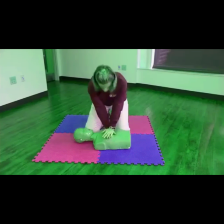

In [152]:
transforms.ColorJitter(brightness=.3, contrast=3, saturation=.3, hue=.3)(im)

In [101]:
np.mod(10,15)

10

In [105]:
n/25

948.24

In [107]:
n/30

790.2

In [108]:
25*30

750

In [116]:
i = 750

if np.mod(i,25)==0:
    print('one')
elif np.mod(i,30)==0:
    print('two')
else:
    print('three')

one


In [189]:
categories[np.unique(data_orig_categories,return_counts=False)[np.argmin(np.unique(data_orig_categories,return_counts=True)[1])]]

'face_slapping'

In [29]:
(np.unique(data_orig_categories,return_counts=True)[1].min(),
np.unique(data_orig_categories,return_counts=True)[1].max(),
np.unique(data_orig_categories,return_counts=True)[1].mean())

(174, 1053, 526.8)

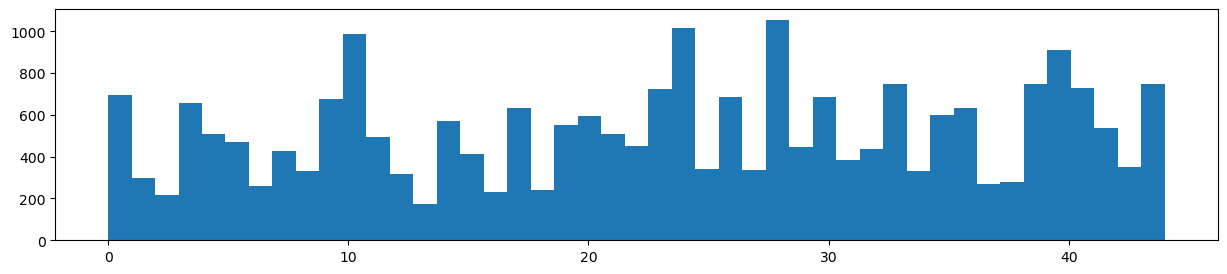

In [23]:
plt.figure(figsize=(15,3))
plt.hist(data_orig_categories,bins=45);

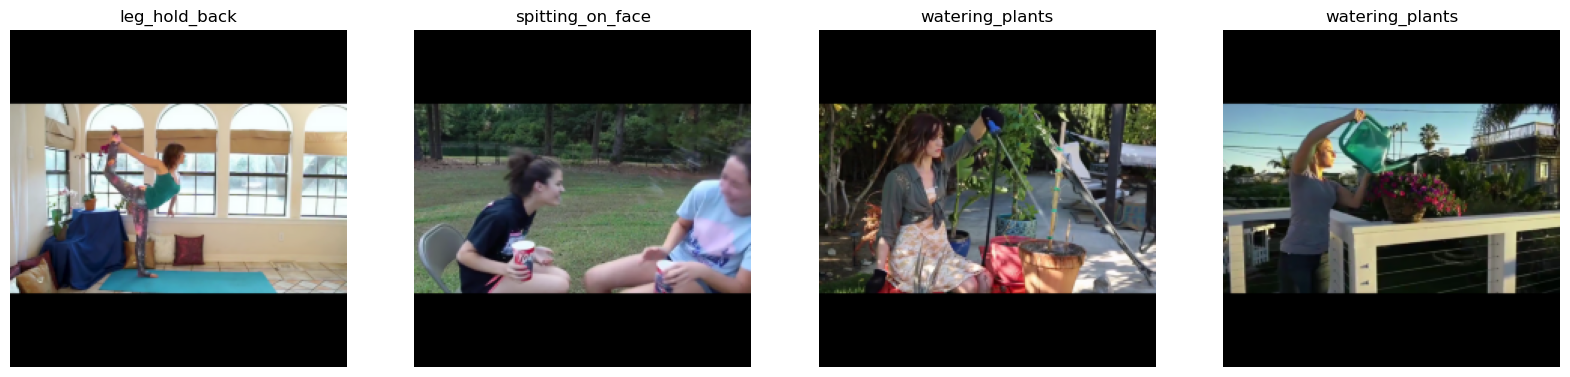

In [9]:
plt.figure(figsize=(20,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    j = np.random.randint(low=0,high=n)
    plt.imshow(data_orig_frames[j,:,:,:].astype(np.float32))
    plt.title(categories[data_orig_categories[j]])
    plt.axis('off')

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

In [39]:
import torch
import torch.nn as nn
from torchvision.models import resnet50, ResNet50_Weights

In [161]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [171]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './Data/pytorch-data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [183]:
dataloaders['train'].dataset

Dataset ImageFolder
    Number of datapoints: 244
    Root location: ./Data/pytorch-data/hymenoptera_data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear), antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [173]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [174]:
num_ftrs = model.fc.in_features
#model.fc = nn.Linear(num_ftrs,n_categories)
model.fc = nn.Linear(num_ftrs,2)

In [175]:
criterion = nn.CrossEntropyLoss()

In [176]:
# Observe that all parameters are being optimized
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [190]:
model = train_model(model, criterion, optimizer,exp_lr_scheduler, num_epochs=25)

In [158]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model